<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/SuminLee/Project5/Project5_0127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
#데이터 확인
df = pd.read_csv("/content/drive/MyDrive/Project5/diabetes_binary_5050split_health_indicators_BRFSS2015.csv", encoding='cp949')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

null 값이 없는 데이터이다.

# 2.이상치 제거

- boxplot을 이용하여 이상치를 제거한다.
- 이상치 제거 대상: BMI

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

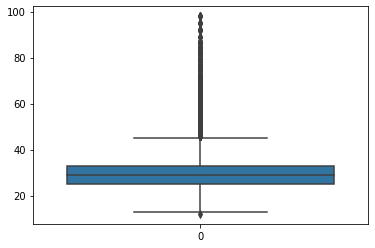

In [19]:
sns.boxplot(data=df['BMI'])

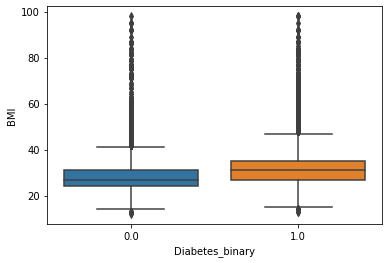

In [20]:
# x = 0: 당뇨병 X, x = 1: 당뇨병 O
sns.boxplot(data=df, x="Diabetes_binary", y="BMI")

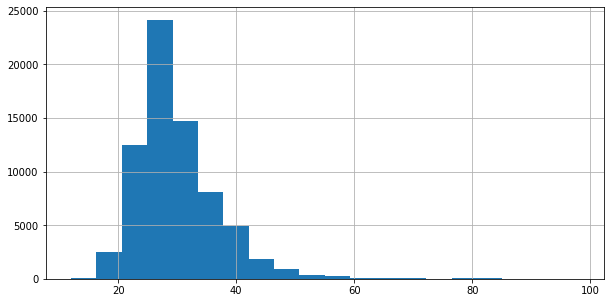

In [9]:
#히스토그램으로 분포 확인 => 20~50 사이에 가장 많이 분포
df['BMI'].hist(bins=20, figsize=(10,5))

일반적인 방식인 IQR을 기준으로 이상치를 제거한다.
- IQR = Q3(3사분위수)-Q1(1사분위수)
- 제거 기준 = (Q3 + IQR * 1.5 보다 큰 값) & (Q1 - IQR * 1.5 보다 작은 값)

In [4]:
#Q1, Q3 확인
Q1 = df['BMI'].quantile(q=0.25)
Q3 = df['BMI'].quantile(q=0.75)
print(Q1)
print(Q3)

25.0
33.0


In [6]:
#IQR = Q3(3사분위수)-Q1(1사분위수)
IQR = Q3 - Q1
IQR

8.0

In [5]:
#범위 확인
print(Q3+IQR*1.5)
print(Q1-IQR*1.5)

NameError: ignored

In [ ]:
#기존 데이터와 이상치를 제거한 데이터 수 비교
IQR_BMI = df[df['BMI']<=(Q3+IQR*1.5)]
IQR_BMI = IQR_BMI[IQR_BMI['BMI']>=(Q1-IQR*1.5)]
print(len(df))
print(len(IQR_BMI))

약 2000개의 데이터가 제거되었다.

In [ ]:
df = IQR_BMI

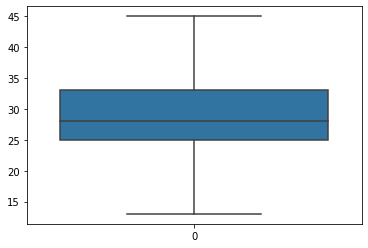

In [27]:
sns.boxplot(data=df['BMI'])

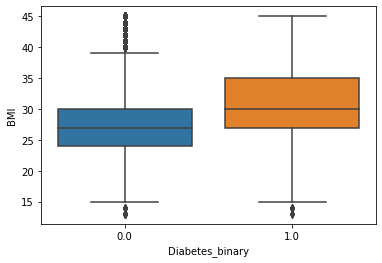

In [28]:
sns.boxplot(data=df, x="Diabetes_binary", y="BMI")

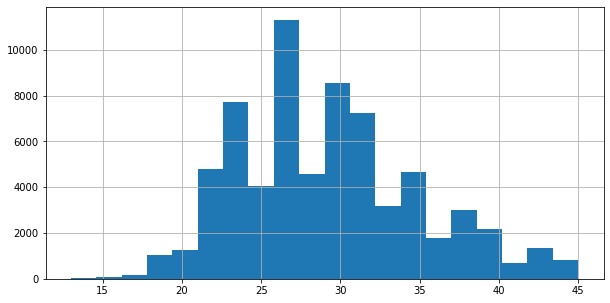

In [29]:
df['BMI'].hist(bins=20, figsize=(10,5))

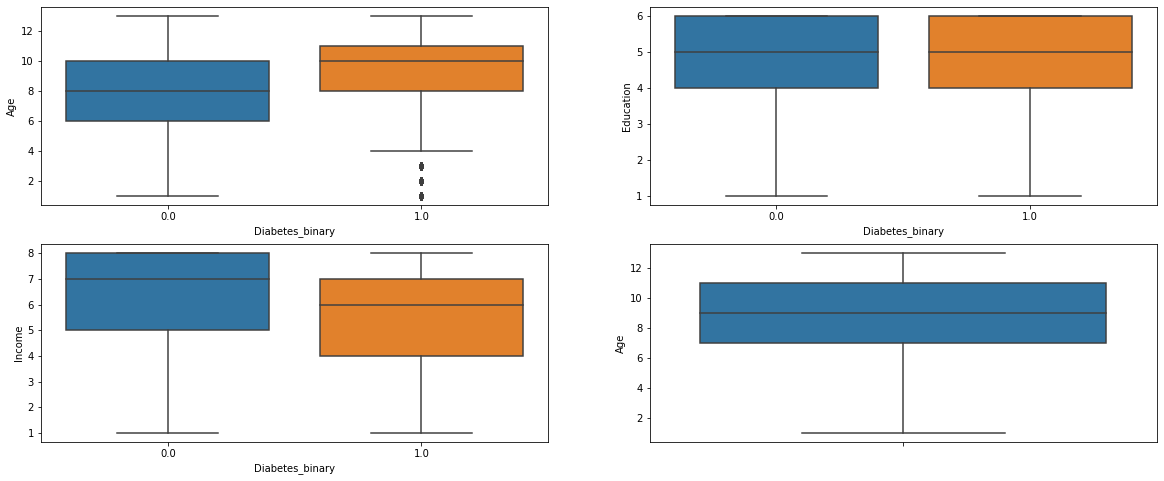

In [42]:
fig,((ax1,ax2),(ax3, ax4)) =plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,8)

sns.boxplot(data=df, x="Diabetes_binary", y="Age", ax=ax1)
sns.boxplot(data=df, x="Diabetes_binary", y="Education", ax=ax2)
sns.boxplot(data=df, x="Diabetes_binary", y="Income", ax=ax3)
sns.boxplot(data=df, orient="v", y="Age", ax=ax4)

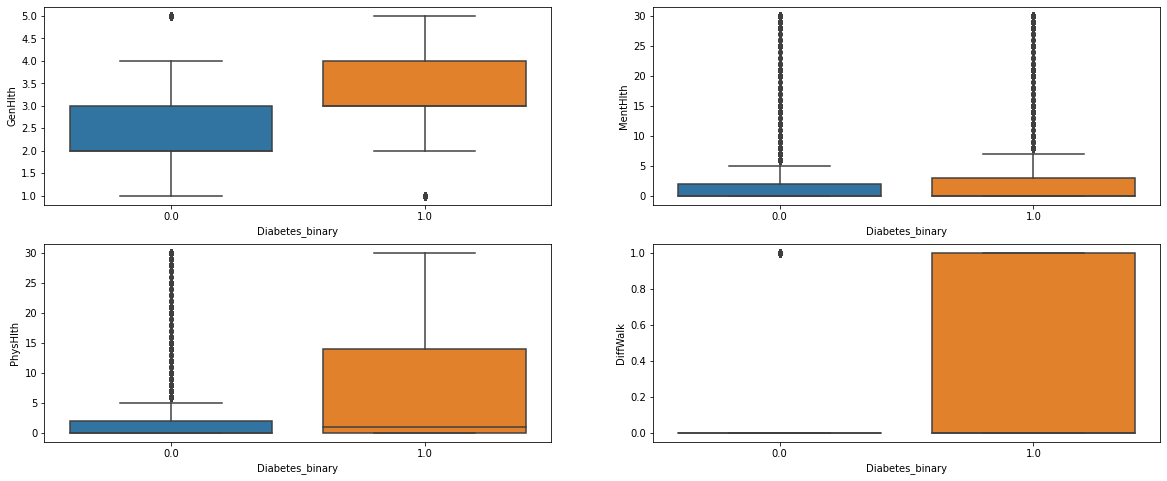

In [32]:
fig,((ax1,ax2),(ax3, ax4)) =plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,8)

sns.boxplot(data=df, x="Diabetes_binary", y="GenHlth", ax=ax1)
sns.boxplot(data=df, x="Diabetes_binary", y="MentHlth", ax=ax2)
sns.boxplot(data=df, x="Diabetes_binary", y="PhysHlth", ax=ax3)
sns.boxplot(data=df, x="Diabetes_binary", y="DiffWalk", ax=ax4)

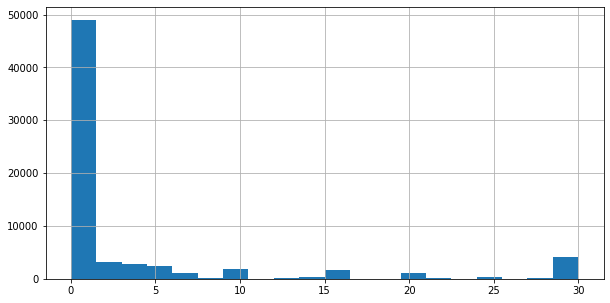

In [34]:
df['MentHlth'].hist(bins=20, figsize=(10,5))

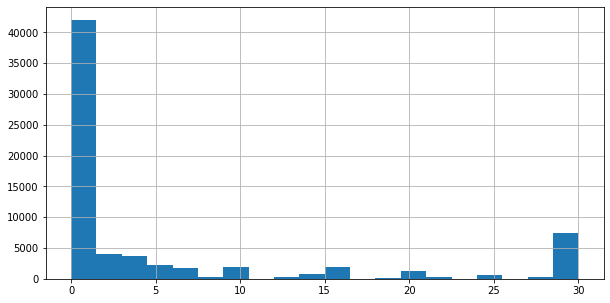

In [35]:
df['PhysHlth'].hist(bins=20, figsize=(10,5))

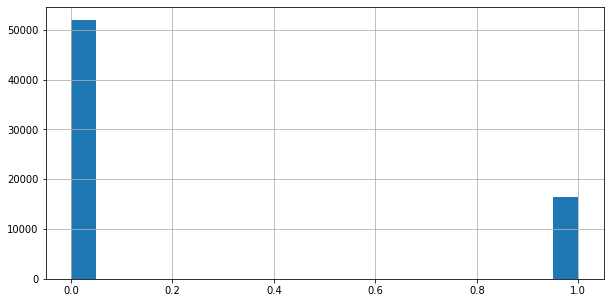

In [36]:
df['DiffWalk'].hist(bins=20, figsize=(10,5))

# 3.데이터 표준화
- BMI 수치, 건강 척도(GenHlth, MentHlth, PhysHlth), 나이, 교육의 정도, 수입의 값들을 모두 같은 기준으로 보는데 무리가 있다.
- 따라서 데이터 표준화를 한다.
- 이상치를 제거 안 한 칼럼들이 있으므로 이상치의 영향을 크게 받는 MinMaxScaler 대신 StandardScaler를 이용한다.

In [6]:
from sklearn.preprocessing import StandardScaler

feature_for_std = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
df_std = df[feature_for_std]

scaler = StandardScaler()
scaler.fit(df_std)
df_std = pd.DataFrame(scaler.transform(df_std), columns=feature_for_std)
df_std

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
0,-0.542176,0.146304,0.153020,2.404008,-1.607237,1.048562,1.058160
1,-0.542176,0.146304,-0.460058,-0.577451,1.197681,1.048562,1.058160
2,-0.542176,-1.649743,-0.460058,0.416369,1.548296,1.048562,1.058160
3,-0.261036,0.146304,-0.460058,-0.279305,0.847066,1.048562,1.058160
4,-0.120466,-0.751719,-0.460058,-0.577451,-0.204778,0.076814,1.058160
...,...,...,...,...,...,...,...
70687,1.004092,1.044328,-0.460058,-0.577451,-0.906008,-0.894934,-2.159964
70688,-0.120466,-0.751719,-0.460058,-0.577451,0.496451,-1.866682,0.138696
70689,-0.682745,1.942351,1.379176,-0.577451,1.548296,1.048562,-0.780768
70690,-1.666734,1.044328,-0.460058,-0.577451,0.847066,-2.838430,-0.780768


In [7]:
feature_names = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
df_remain = df[feature_names]
df_remain = df_remain.reset_index(drop=True)
df_remain

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
70688,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
70689,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
70690,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [8]:
df_std = pd.concat([df_remain, df_std], axis=1, ignore_index=False)
df_std

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,NoDocbcCost,DiffWalk,Sex,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-0.542176,0.146304,0.153020,2.404008,-1.607237,1.048562,1.058160
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,-0.542176,0.146304,-0.460058,-0.577451,1.197681,1.048562,1.058160
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,-0.542176,-1.649743,-0.460058,0.416369,1.548296,1.048562,1.058160
3,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,-0.261036,0.146304,-0.460058,-0.279305,0.847066,1.048562,1.058160
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,-0.120466,-0.751719,-0.460058,-0.577451,-0.204778,0.076814,1.058160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.004092,1.044328,-0.460058,-0.577451,-0.906008,-0.894934,-2.159964
70688,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,-0.120466,-0.751719,-0.460058,-0.577451,0.496451,-1.866682,0.138696
70689,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.682745,1.942351,1.379176,-0.577451,1.548296,1.048562,-0.780768
70690,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.666734,1.044328,-0.460058,-0.577451,0.847066,-2.838430,-0.780768


# 4.더미변수 생성

In [9]:
original_df = df_std
category_feature=['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
df_std = pd.get_dummies(df_std, columns=category_feature)
df_std

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income,HighBP_0.0,HighBP_1.0,HighChol_0.0,...,HvyAlcoholConsump_0.0,HvyAlcoholConsump_1.0,AnyHealthcare_0.0,AnyHealthcare_1.0,NoDocbcCost_0.0,NoDocbcCost_1.0,DiffWalk_0.0,DiffWalk_1.0,Sex_0.0,Sex_1.0
0,-0.542176,0.146304,0.153020,2.404008,-1.607237,1.048562,1.058160,0,1,1,...,1,0,0,1,1,0,1,0,0,1
1,-0.542176,0.146304,-0.460058,-0.577451,1.197681,1.048562,1.058160,0,1,0,...,1,0,0,1,1,0,1,0,0,1
2,-0.542176,-1.649743,-0.460058,0.416369,1.548296,1.048562,1.058160,1,0,1,...,1,0,0,1,1,0,1,0,0,1
3,-0.261036,0.146304,-0.460058,-0.279305,0.847066,1.048562,1.058160,0,1,0,...,1,0,0,1,1,0,1,0,0,1
4,-0.120466,-0.751719,-0.460058,-0.577451,-0.204778,0.076814,1.058160,1,0,1,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.004092,1.044328,-0.460058,-0.577451,-0.906008,-0.894934,-2.159964,1,0,0,...,1,0,0,1,1,0,1,0,1,0
70688,-0.120466,-0.751719,-0.460058,-0.577451,0.496451,-1.866682,0.138696,1,0,0,...,1,0,0,1,1,0,0,1,0,1
70689,-0.682745,1.942351,1.379176,-0.577451,1.548296,1.048562,-0.780768,0,1,0,...,1,0,0,1,1,0,0,1,1,0
70690,-1.666734,1.044328,-0.460058,-0.577451,0.847066,-2.838430,-0.780768,0,1,0,...,1,0,0,1,1,0,0,1,1,0


In [10]:
df_clean = pd.concat([df['Diabetes_binary'], df_std], axis=1, ignore_index=False)
df_clean

,Diabetes_binary,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income,HighBP_0.0,HighBP_1.0,...,HvyAlcoholConsump_0.0,HvyAlcoholConsump_1.0,AnyHealthcare_0.0,AnyHealthcare_1.0,NoDocbcCost_0.0,NoDocbcCost_1.0,DiffWalk_0.0,DiffWalk_1.0,Sex_0.0,Sex_1.0
0,0.0,-0.542176,0.146304,0.153020,2.404008,-1.607237,1.048562,1.058160,0,1,...,1,0,0,1,1,0,1,0,0,1
1,0.0,-0.542176,0.146304,-0.460058,-0.577451,1.197681,1.048562,1.058160,0,1,...,1,0,0,1,1,0,1,0,0,1
2,0.0,-0.542176,-1.649743,-0.460058,0.416369,1.548296,1.048562,1.058160,1,0,...,1,0,0,1,1,0,1,0,0,1
3,0.0,-0.261036,0.146304,-0.460058,-0.279305,0.847066,1.048562,1.058160,0,1,...,1,0,0,1,1,0,1,0,0,1
4,0.0,-0.120466,-0.751719,-0.460058,-0.577451,-0.204778,0.076814,1.058160,1,0,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,1.004092,1.044328,-0.460058,-0.577451,-0.906008,-0.894934,-2.159964,1,0,...,1,0,0,1,1,0,1,0,1,0
70688,1.0,-0.120466,-0.751719,-0.460058,-0.577451,0.496451,-1.866682,0.138696,1,0,...,1,0,0,1,1,0,0,1,0,1
70689,1.0,-0.682745,1.942351,1.379176,-0.577451,1.548296,1.048562,-0.780768,0,1,...,1,0,0,1,1,0,0,1,1,0
70690,1.0,-1.666734,1.044328,-0.460058,-0.577451,0.847066,-2.838430,-0.780768,0,1,...,1,0,0,1,1,0,0,1,1,0


# 5.모델 생성

In [14]:
x = df_std
y = df['Diabetes_binary']

In [15]:
#train/test set split
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)


In [16]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(54808, 35)
(54808,)
(13703, 35)
(13703,)


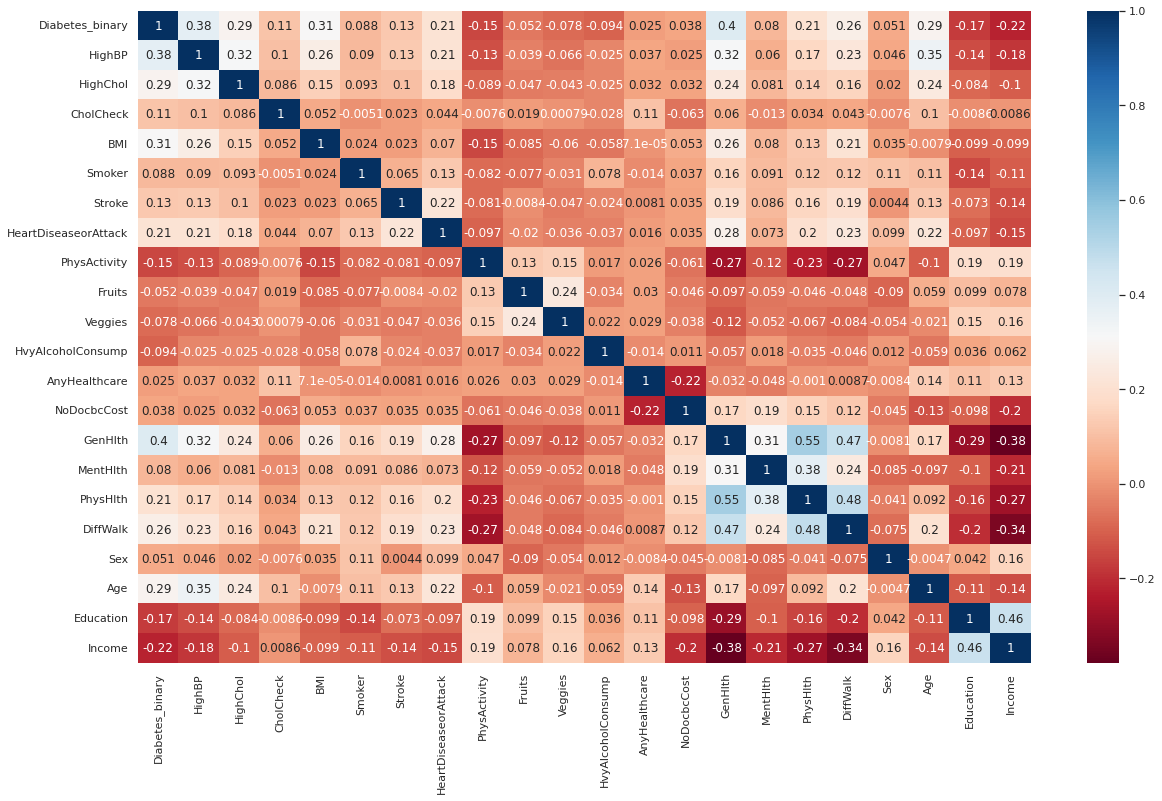

In [69]:
cols = df.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
sns.set(rc = {'figure.figsize':(20,12)})
sns.heatmap(df[cols].corr(), annot=True, cmap="RdBu")
plt.show()

## 1) Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=15, random_state=20)
model.fit(train_x, train_y)

pred_y = model.predict(test_x)
print("Training set accuracy :", model.score(train_x, train_y))
print("Test set accuracy :", model.score(test_x, test_y))


Training set accuracy : 0.7832615676543571
Test set accuracy : 0.7160475808217178


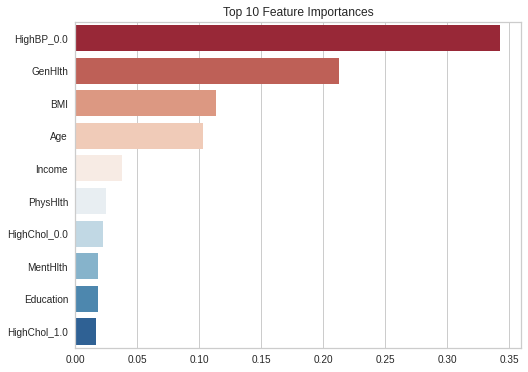

In [42]:
# feature importances
dtc_importances_values = model.feature_importances_
dtc_importances = pd.Series(dtc_importances_values, index=train_x.columns)
dtc_top10 = dtc_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Top 10 Feature Importances')
sns.barplot(x=dtc_top10, y=dtc_top10.index, palette="RdBu")
plt.show()

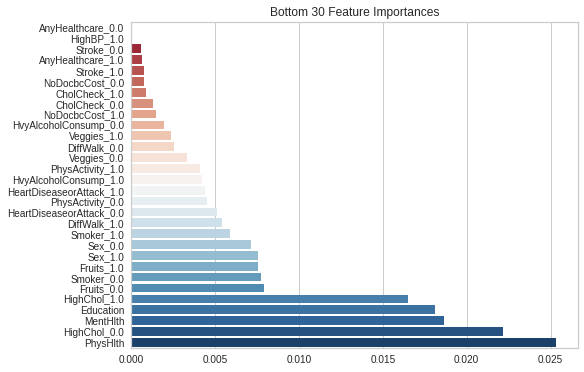

In [43]:
dtc_bottom30 = dtc_importances.sort_values(ascending=True)[:30]

plt.figure(figsize=(8,6))
plt.title('Bottom 30 Feature Importances')
sns.barplot(x=dtc_bottom30, y=dtc_bottom30.index, palette="RdBu")
plt.show()

## 2) Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

model = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
model.fit(train_x,train_y)

pred_y = model.predict(test_x)
print("Training set accuracy :", model.score(train_x, train_y))
print("Test set accuracy :", model.score(test_x, test_y))

Training set accuracy : 0.7365348124361407
Test set accuracy : 0.7323943661971831


In [45]:
# 하이퍼파라미터 조정: sample 100개, tree depth - 20

model = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0)
model.fit(train_x,train_y)

pred_y = model.predict(test_x)
print("Training set accuracy :", model.score(train_x, train_y))
print("Test set accuracy :", model.score(test_x, test_y))

Training set accuracy : 0.948164501532623
Test set accuracy : 0.7402028752827848


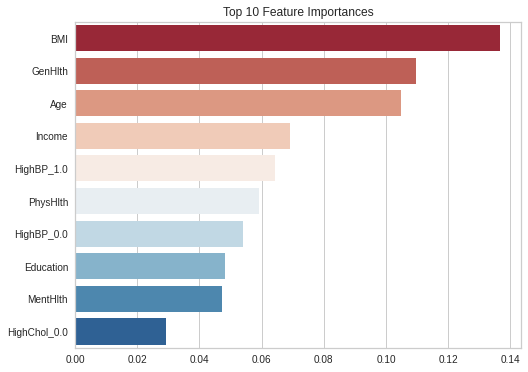

In [46]:
#feature importances
rf_importances_values = model.feature_importances_
rf_importances = pd.Series(rf_importances_values, index=train_x.columns)
rf_top10 = rf_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Top 10 Feature Importances')
sns.barplot(x=rf_top10, y=rf_top10.index, palette="RdBu")
plt.show()

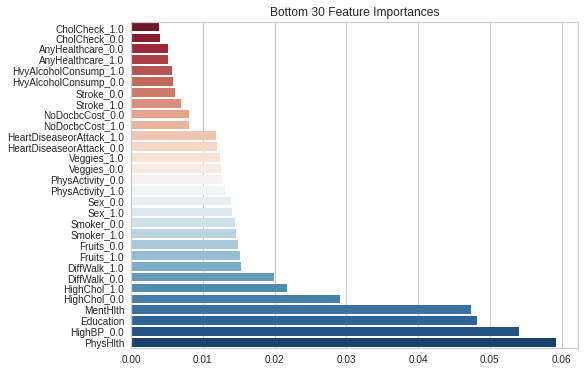

In [47]:
rf_bottom30 = rf_importances.sort_values(ascending=True)[:30]

plt.figure(figsize=(8,6))
plt.title('Bottom 30 Feature Importances')
sns.barplot(x=rf_bottom30, y=rf_bottom30.index, palette="RdBu")
plt.show()

## 3) Gradient Boost

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=20, max_depth=5,random_state=0)
model.fit(train_x,train_y)

pred_y = model.predict(test_x)
print("Training set accuracy :", model.score(train_x, train_y))
print("Test set accuracy :", model.score(test_x, test_y))

Training set accuracy : 0.7518245511604146
Test set accuracy : 0.7479384076479603


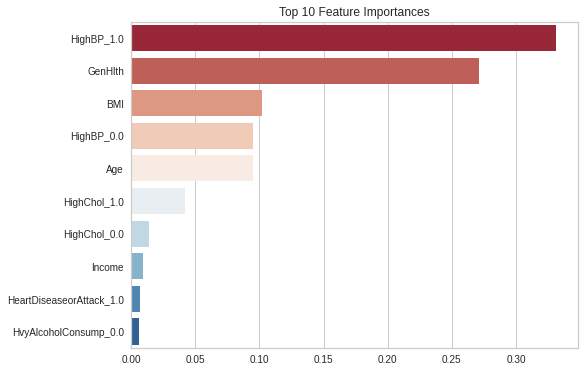

In [55]:
#feature importances
gtb_importances_values = model.feature_importances_
gtb_importances = pd.Series(gtb_importances_values, index=train_x.columns)
gtb_top10 = gtb_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Top 10 Feature Importances')
sns.barplot(x=gtb_top10, y=gtb_top10.index, palette="RdBu")
plt.show()

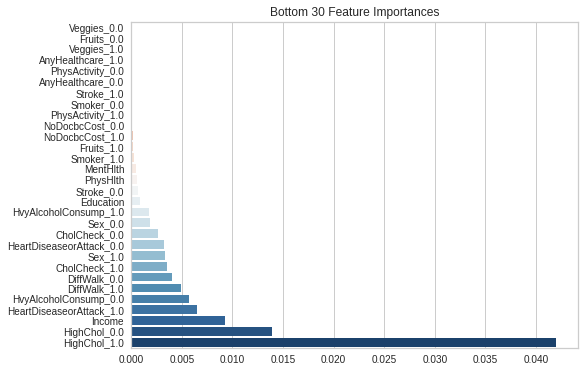

In [56]:
gtb_bottom30 = gtb_importances.sort_values(ascending=True)[:30]

plt.figure(figsize=(8,6))
plt.title('Bottom 30 Feature Importances')
sns.barplot(x=gtb_bottom30, y=gtb_bottom30.index, palette="RdBu")
plt.show()

# 6.칼럼 제거 (feature importances 기반)

In [11]:
#AnyHealthcare, Stroke, Cholcheck 삭제
df_std_2 = original_df.drop(labels='AnyHealthcare', axis=1)
df_std_2 = df_std_2.drop(labels='Stroke', axis=1)
df_std_2 = df_std_2.drop(labels='CholCheck', axis=1)

In [12]:
df_std_2

,HighBP,HighChol,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,NoDocbcCost,DiffWalk,Sex,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.542176,0.146304,0.153020,2.404008,-1.607237,1.048562,1.058160
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.542176,0.146304,-0.460058,-0.577451,1.197681,1.048562,1.058160
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.542176,-1.649743,-0.460058,0.416369,1.548296,1.048562,1.058160
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.261036,0.146304,-0.460058,-0.279305,0.847066,1.048562,1.058160
4,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.120466,-0.751719,-0.460058,-0.577451,-0.204778,0.076814,1.058160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.004092,1.044328,-0.460058,-0.577451,-0.906008,-0.894934,-2.159964
70688,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,-0.120466,-0.751719,-0.460058,-0.577451,0.496451,-1.866682,0.138696
70689,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.682745,1.942351,1.379176,-0.577451,1.548296,1.048562,-0.780768
70690,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.666734,1.044328,-0.460058,-0.577451,0.847066,-2.838430,-0.780768


In [13]:
category_feature=['HighBP', 'HighChol', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost', 'DiffWalk', 'Sex']
df_std_2 = pd.get_dummies(df_std_2, columns=category_feature)
df_std_2

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income,HighBP_0.0,HighBP_1.0,HighChol_0.0,...,Veggies_0.0,Veggies_1.0,HvyAlcoholConsump_0.0,HvyAlcoholConsump_1.0,NoDocbcCost_0.0,NoDocbcCost_1.0,DiffWalk_0.0,DiffWalk_1.0,Sex_0.0,Sex_1.0
0,-0.542176,0.146304,0.153020,2.404008,-1.607237,1.048562,1.058160,0,1,1,...,0,1,1,0,1,0,1,0,0,1
1,-0.542176,0.146304,-0.460058,-0.577451,1.197681,1.048562,1.058160,0,1,0,...,1,0,1,0,1,0,1,0,0,1
2,-0.542176,-1.649743,-0.460058,0.416369,1.548296,1.048562,1.058160,1,0,1,...,0,1,1,0,1,0,1,0,0,1
3,-0.261036,0.146304,-0.460058,-0.279305,0.847066,1.048562,1.058160,0,1,0,...,0,1,1,0,1,0,1,0,0,1
4,-0.120466,-0.751719,-0.460058,-0.577451,-0.204778,0.076814,1.058160,1,0,1,...,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.004092,1.044328,-0.460058,-0.577451,-0.906008,-0.894934,-2.159964,1,0,0,...,0,1,1,0,1,0,1,0,1,0
70688,-0.120466,-0.751719,-0.460058,-0.577451,0.496451,-1.866682,0.138696,1,0,0,...,0,1,1,0,1,0,0,1,0,1
70689,-0.682745,1.942351,1.379176,-0.577451,1.548296,1.048562,-0.780768,0,1,0,...,1,0,1,0,1,0,0,1,1,0
70690,-1.666734,1.044328,-0.460058,-0.577451,0.847066,-2.838430,-0.780768,0,1,0,...,1,0,1,0,1,0,0,1,1,0


In [14]:
x = df_std_2
y = df['Diabetes_binary']

In [15]:
#train/test set split
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)


In [16]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(56553, 29)
(56553,)
(14139, 29)
(14139,)


In [76]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=15, random_state=20)
model.fit(train_x, train_y)

pred_y = model.predict(test_x)
print("Training set accuracy :", model.score(train_x, train_y))
print("Test set accuracy :", model.score(test_x, test_y))


Training set accuracy : 0.7829878849802948
Test set accuracy : 0.7179449755527987


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

model = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
model.fit(train_x,train_y)

pred_y = model.predict(test_x)
print("Training set accuracy :", model.score(train_x, train_y))
print("Test set accuracy :", model.score(test_x, test_y))

Training set accuracy : 0.7377937527368268
Test set accuracy : 0.7341458074874115


In [78]:
# sample 100개, tree depth - 20

model = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0)
model.fit(train_x,train_y)

pred_y = model.predict(test_x)
print("Training set accuracy :", model.score(train_x, train_y))
print("Test set accuracy :", model.score(test_x, test_y))

Training set accuracy : 0.9659721208582689
Test set accuracy : 0.7356053418959352


In [18]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=20, max_depth=5,random_state=0)
model.fit(train_x,train_y)

pred_y = model.predict(test_x)
print("Training set accuracy :", model.score(train_x, train_y))
print("Test set accuracy :", model.score(test_x, test_y))

Training set accuracy : 0.7513482927519318
Test set accuracy : 0.7505481292877856


In [20]:
from sklearn.model_selection import GridSearchCV

param = {
    "n_estimators":[20, 30, 50],
    "max_depth":[5, 10, 20, 30]
}

m=GradientBoostingClassifier()
gs = GridSearchCV(m, param_grid=param, cv=5, refit=True)

gs.fit(train_x, train_y)
m=gs.best_estimator_

print("train_score:{}".format(m.score(train_x, train_y)))
print("test_score:{}".format(m.score(test_x, test_y)))
print(gs.best_score_)
print(gs.best_params_)

KeyboardInterrupt: ignored